# Webscraping HM sale prices

In [ ]:
if (!require("rvest")) install.packages("rvest")
library("rvest")

We are going to read in a page at H&M for sales:

In [ ]:
# url<-"https://www2.hm.com/en_us/sale/women/tops.html?page-size=2448"
# url<-"https://www2.hm.com/en_us/sale/women/jackets-coats.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/shirts-blouses.html?page-size=252"
url<-"https://www2.hm.com/en_us/sale/women/dresses.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/maternity-wear.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/basics.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/shoes.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/jeans.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/swimwear.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/accessories.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/lingerie.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/view-all.html?page-size=2448"
# url<-"https://www2.hm.com/en_us/sale/women/pants.html?page-size=252"
# url<-"https://www2.hm.com/en_us/sale/women/lingerie.html?page-size=2448"

webpage <- read_html(url)

Now we can identify the sale price:

In [ ]:
nodes <- html_nodes(webpage, ".sale")
sale <- html_text(nodes)
sale <- gsub("$ ","", sale, fixed=TRUE)
sale <- as.numeric(sale)
str(sale,20)

 num [1:196] 10.99 10.99 9.99 12.99 12.99 ...

Lets take a look at the first few values:

In [ ]:
head(sale,20)

 [1] 10.99 10.99  9.99 12.99 12.99  6.99  9.99  2.99  4.99  4.99  4.99  8.99
[13] 12.99  9.99 10.99 11.99 12.99  8.99 11.99 10.99

Now we can identify the name of the item:

In [ ]:
nodes <- html_nodes(webpage, ".item-heading .link")
name <- html_text(nodes)
str(name)

 chr [1:196] "Linen-blend Shirt Dress" "Button-front Jersey Dress" ...

Lets take a look at the first few values:

In [ ]:
head(name,20)

 [1] "Linen-blend Shirt Dress"    "Button-front Jersey Dress" 
 [3] "Terry T-shirt Dress"        "Smocked Cotton Dress"      
 [5] "Wrap Dress"                 "Ribbed Bodycon Dress"      
 [7] "Cut-out Dress"              "Halterneck Bodycon Dress"  
 [9] "Bandeau Dress"              "Bandeau Dress"             
[11] "Bodycon Dress with Cut-out" "Button-front Jersey Dress" 
[13] "V-neck Slip Dress"          "Terry T-shirt Dress"       
[15] "Linen-blend Shirt Dress"    "Cut-out Dress"             
[17] "Smocked Dress"              "V-neck Dress"              
[19] "Terry T-shirt Dress"        "Balloon-sleeved Dress"     

Now we identify the regular price:

In [ ]:
nodes <- html_nodes(webpage, ".regular")
price <- html_text(nodes)
price <- gsub("$","", price, fixed=TRUE)
price <- as.numeric(price)
str(price)

 num [1:196] 30 25 28 25 25 ...

Lets take a look at the first few values:

In [ ]:
head(price,20)

 [1] 29.99 24.99 27.99 24.99 24.99 17.99 24.99  5.99 12.99 12.99 14.99 24.99
[13] 29.99 27.99 29.99 24.99 29.99 19.99 27.99 29.99

Lets make a data frame with the `name`, `sale`, `price` and `discount`:

In [ ]:
discount <- round((price-sale)/price*100)
df<-data.frame(name,sale,price, discount)
head(df,20)

                         name  sale price discount
1     Linen-blend Shirt Dress 10.99 29.99       63
2   Button-front Jersey Dress 10.99 24.99       56
3         Terry T-shirt Dress  9.99 27.99       64
4        Smocked Cotton Dress 12.99 24.99       48
5                  Wrap Dress 12.99 24.99       48
6        Ribbed Bodycon Dress  6.99 17.99       61
7               Cut-out Dress  9.99 24.99       60
8    Halterneck Bodycon Dress  2.99  5.99       50
9               Bandeau Dress  4.99 12.99       62
10              Bandeau Dress  4.99 12.99       62
11 Bodycon Dress with Cut-out  4.99 14.99       67
12  Button-front Jersey Dress  8.99 24.99       64
13          V-neck Slip Dress 12.99 29.99       57
14        Terry T-shirt Dress  9.99 27.99       64
15    Linen-blend Shirt Dress 10.99 29.99       63
16              Cut-out Dress 11.99 24.99       52
17              Smocked Dress 12.99 29.99       57
18               V-neck Dress  8.99 19.99       55
19        Terry T-shirt Dress 1

                          name  sale price discount
177 Puff-sleeved Brocade Dress 38.99 79.99       51
178               Fitted Dress 12.99 24.99       48
179          Calf-length Dress 24.99 49.99       50
180         Puff-sleeved Dress 27.99 59.99       53
181                 Lace Dress 33.99 49.99       32
182           Sleeveless Dress  8.99 17.99       50
183         Puff-sleeved Dress 29.99 59.99       50
184             Glittery Dress 16.99 34.99       51
185      Shimmery Fitted Dress 16.99 34.99       51
186 Lace Stand-up Collar Dress 38.99 79.99       51
187                 Mesh Dress 12.99 24.99       48
188 Lace Stand-up Collar Dress 45.99 79.99       43
189        Ribbed Jersey Dress  6.99 12.99       46
190                 Knit Dress 20.99 34.99       40
191             Gathered Dress 20.99 49.99       58
192       Draped Bodycon Dress 20.99 49.99       58
193       Gathered Satin Dress 11.99 29.99       60
194      Shimmery Fitted Dress 19.99 34.99       43
195         

Lets create a new data frame with the discounts sorted:

In [ ]:
dfnew <- df[order(df$discount),]
names(dfnew)<-NULL
head(dfnew,20)

                                             
162         Smock-detail Dress 19.99 24.99 20
122             Sequined Dress 54.99 69.99 21
92   Calf-length T-shirt Dress 14.99 19.99 25
120    H&M+ Button-front Dress 25.99 34.99 26
174          Slit-detail Dress 25.99 34.99 26
93       Long Halterneck Dress 35.99 49.99 28
170          H&M+ V-neck Dress 24.99 34.99 29
108      Flounce-trimmed Dress 20.99 29.99 30
154 H&M+ Flounce-trimmed Dress 20.99 29.99 30
78                Cotton Dress 16.99 24.99 32
181                 Lace Dress 33.99 49.99 32
32    Halterneck Bodycon Dress  3.99  5.99 33
50   Crochet-look Jersey Dress 11.99 17.99 33
72                Cotton Dress 11.99 17.99 33
73        Tie-belt Shirt Dress 19.99 29.99 33
91           Draped Slip Dress 11.99 17.99 33
128    Sleeveless Jersey Dress  9.99 14.99 33
41           Open-backed Dress 22.99 34.99 34
149               V-neck Dress 22.99 34.99 34
36           Long V-neck Dress 38.99 59.99 35

                                              
138                Fitted Dress  4.99 12.99 62
1       Linen-blend Shirt Dress 10.99 29.99 63
15      Linen-blend Shirt Dress 10.99 29.99 63
20        Balloon-sleeved Dress 10.99 29.99 63
70      Patterned Printed Dress 10.99 29.99 63
80  H&M+ Off-the-shoulder Dress 12.99 34.99 63
147               Cut-out Dress 10.99 29.99 63
3           Terry T-shirt Dress  9.99 27.99 64
12    Button-front Jersey Dress  8.99 24.99 64
14          Terry T-shirt Dress  9.99 27.99 64
129                Fitted Dress  6.99 19.99 65
11   Bodycon Dress with Cut-out  4.99 14.99 67
44    Lacing-detail Denim Dress 10.99 34.99 69
169       Flounce-trimmed Dress 10.99 34.99 69
38           Jersey Shirt Dress  8.99 29.99 70
53                  Terry Dress  5.99 19.99 70
118  Leopard-print Jersey Dress 29.99 99.00 70
135                V-neck Dress 17.99 59.99 70
141     Sleeveless Jersey Dress  2.99  9.99 70
42         Smocked Cotton Dress  6.99 24.99 72

Lets take a look at a histogram of the discounts:

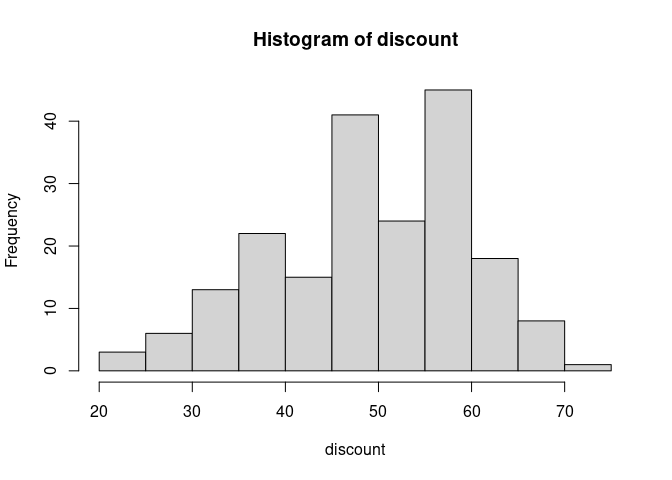

In [ ]:
hist(discount)

In [ ]:
range(discount)

[1] 20 72

[1] 49.80102

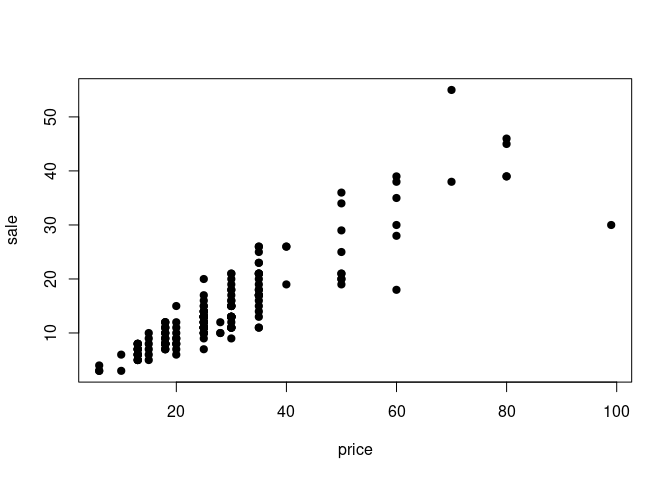

[1] 0.8964223

In [ ]:
plot(price, sale, pch=19)